# Building an XGBoost model

## Step 1: Imports

In [2]:
# Import relevant libraries and modules.
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
pd.set_option("display.max_columns", None)

### Load the dataset

In [3]:
# MPORT THE DATA. 
airline_data = pd.read_csv('Invistico_Airline.csv', error_bad_lines=False)

In [4]:
# Display the first ten rows of data.
airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


In [5]:
# Displaying the data type for each column in the DataFrame.
airline_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

## Step 2: Model preparation

Before you proceed with modeling, consider which metrics you will ultimately want to leverage to evaluate your model.

In [6]:
# Converting the object predictor variables to numerical dummies.
dummies = pd.get_dummies(airline_data, columns=["satisfaction", "Customer Type", "Type of Travel", "Class"])
dummies.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_dissatisfied,satisfaction_satisfied,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1,1,0,0,1,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,1,1,0,0,1,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,1,1,0,0,1,0,1,0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,1,1,0,0,1,0,1,0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,1,1,0,0,1,0,1,0


### Isolate your target and predictor variables

In [7]:
# Define the y (target) variable.
y=dummies["satisfaction_satisfied"]

# Define the X (predictor) variables.
X=dummies.drop(["satisfaction_satisfied","satisfaction_dissatisfied"], axis=1)
X

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1,0,0,1,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,1,0,0,1,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1,0,0,1,0,1,0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1,0,0,1,0,1,0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0,0,1,0,1,0,1,0
129876,63,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0,0,1,0,1,1,0,0
129877,69,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0,0,1,0,1,0,1,0
129878,66,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0,0,1,0,1,0,1,0


### Divide your data 

Dividing into training set (75% of the data) and test set (25% of the data).

In [8]:
# Perform the split operation on the data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=0)

## Step 3: Model building

### Instantiate XGBClassifer

In [9]:
# Define xgb to be the XGBClassifier.
xgb =XGBClassifier(objective="binary:logistic", random_state=0)

### Hyperparameters

In [10]:
# Define parameters for tuning to `cv_params`.
cv_params = {
    'max_depth': [4],
    'min_child_weight': [3],
    'learning_rate': [0.1],
    'n_estimators': [5],
    'subsample': [0.7],
    'colsample_bytree': [0.7] }

### Defining how the models will be evaluated

In [11]:
# Define your criteria as `scoring`.
scoring = {"accuracy", "precision", "recall", "f1"}

### Construct GridSearch cross-validation

In [12]:
# Construct GridSearch.
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring,cv=5,refit="f1")

### Fit the GridSearch model to your training data

In [13]:
%%time
# fitting the GridSearch model to training data
# NOTE: takes some minutes to run
xgb_cv =xgb_cv.fit(X_train,y_train)
xgb_cv

CPU times: user 1min 52s, sys: 526 ms, total: 1min 53s
Wall time: 56.5 s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': 

In [14]:
# Using "pickle" to save the trained model.
pickle.dump(xgb_cv,open("xgb_cv.sav","wb"))

## Step 4: Results and evaluation

In [15]:
# Apply the model to predict test data.
y_predict=xgb_cv.predict(X_test)

In [16]:
# 1. Accuracy score.

acc = metrics.accuracy_score(y_test,y_predict)

# 2. Precision score.
pre = metrics.precision_score(y_test,y_predict)

# 3. Recall score.
rec = metrics.recall_score(y_test,y_predict)

# 4. f1 score.
f1 = metrics.f1_score(y_test,y_predict)

## Printing results ##
print("The accuracy score was: ",acc)
print("The precision score was: ",pre)
print("The recall score was: ",rec)
print("The f1 score was: ",f1)

The accuracy score was:  0.8703110563597166
The precision score was:  0.8785036354554032
The recall score was:  0.8867226890756302
The f1 score was:  0.8825940279365433


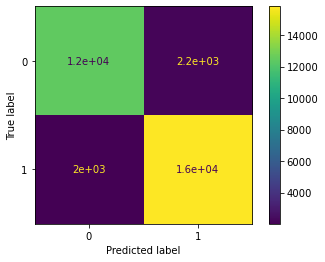

In [17]:
# Constructing the confusion matrix for your predicted and test values.
CM=metrics.confusion_matrix(y_test,y_predict)

# Creating the display for your confusion matrix.
display=metrics.ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=xgb_cv.classes_)

# Plot the visual in-line.
display.plot()

### Visualize most important features

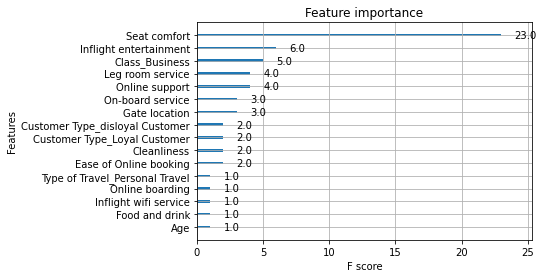

In [18]:
# Plot the relative feature importance of the predictor variables in the model.
plot_importance(xgb_cv.best_estimator_)

In [19]:
# Create a table of results to compare model performance.
table = pd.DataFrame({'Model': ["Tuned Decision Tree", "Tuned Random Forest", "Tuned XGBoost"],
                      'F1': [0.945422, 0.947306, f1],
                      'Recall': [0.935863, 0.944501, rec],
                      'Precision': [0.955197, 0.950128, pre],
                      'Accuracy': [0.940864, 0.942450, acc]})
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864
1,Tuned Random Forest,0.947306,0.944501,0.950128,0.942450
2,Tuned XGBoost,0.882594,0.886723,0.878504,0.870311
